# Example of usage Spark OCR ImageToTextV4,5,6 for complex cases

This notebook demonstrate abilities to recognize text in complex cases using family of ImageToText transformers. These transformers use recent multimodal approaches that work on our servers. Please contact to us to get addresses for demo.

Install spark-ocr python package.
Specify following data:
- secret
- license
- addresses of servers

In [1]:
secret = ""
license = ""
URL_V4 = ""
URL_V5 = ""
URL_V6 = ""

version = secret.split("-")[0]
spark_ocr_jar_path = "../../../spark-ocr/target/scala-2.12/"

## Initialization of spark session

In [ ]:
from sparkocr import start
from pyspark import SparkConf
import os

if license:
    os.environ['SPARK_OCR_LICENSE'] = license

conf = SparkConf() \
.set("spark.extraListeners", "com.johnsnowlabs.license.LicenseLifeCycleManager") \
.set("spark.sql.legacy.allowUntypedScalaUDF", "true")

spark = start(jar_path = spark_ocr_jar_path, extra_conf=conf)

spark

In [3]:
from pyspark.ml import PipelineModel
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import display_images

# Mixed, both printed and handwritten case


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/data/handwritten/9.jpg
    Resolution: 0 dpi
    Width: 624 px
    Height: 498 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


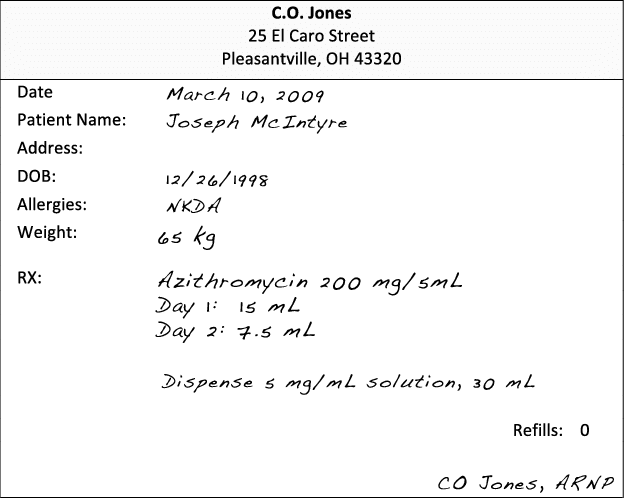

In [4]:
imagePath = '../data/handwritten/9.jpg'
df = spark.read.format("binaryFile").load(imagePath)

display_images(BinaryToImage().setImageType(ImageType.TYPE_3BYTE_BGR).transform(df), "image")

In [5]:
ocr = ImageToTextV4() \
.setInputCol("content") \
.setOutputCol("text") \
.setServerAddress(URL_V4)

res = ocr.transform(df)
for r in res.select("path", "text").collect():
    print(r["text"])

C.O. Jones  
25 El Caro Street  
Pleasantville, OH 43320  

Date: March 10, 2009  

Patient Name: Joseph McIntyre  

Address:  

DOB: 12/26/1998  

Allergies: NKDA  

Weight: 65 kg  

RX: Azithromycin 200 mg/mL  

Day 1: 15 mL  

Day 2: 7.5 mL  

Dispense 5 mg/mL solution, 30 mL  

Refills: 0  

CO Jones, ARNP


In [16]:
ocr = ImageToTextV5() \
.setInputCol("content") \
.setOutputCol("text") \
.setServerAddress(URL_V5)

res = ocr.transform(df)
for r in res.select("path", "text").collect():
    #print(r["path"]+"\n")
    print(r["text"])

C.O. Jones
25 El Caro Street
Pleasantville, OH 43320
Date
March 10, 2009
Patient Name:
Joseph McIntyre
Address:
DOB:
12/26/1998
Allergies:
NKDA
Weight:
65 kg
RX:
Azithromycin 200 mg/5mL
Day 1: 15 mL
Day 2: 7.5 mL
Dispense 5 mg/mL solution, 30 mL
Refills: 0
CO Jones, ARNP



In [5]:
ocr = ImageToTextV6() \
.setInputCol("content") \
.setOutputCol("text") \
.setServerAddress(URL_V6)

res = ocr.transform(df)
print(res.select("path", "text").collect()[0]["text"])

**Header:**
- C.O. Jones
- 25 El Caro Street
- Pleasantville, OH 43320

**Date:**
- March 10, 2009

**Patient Information:**
- Patient Name: Joseph McIntyre
- Address:
-


# Irregular background

It is often case when text is over medical images like dicom ones.


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/data/dicom/6670427471_05-26-2000-FORFILE_CT_ABD_ANDOR_PEL_-_CD-25398_5_000000-NEPHRO__4_0__B40f__M0_4-18678_1-010.jpg
    Resolution: 0 dpi
    Width: 512 px
    Height: 512 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


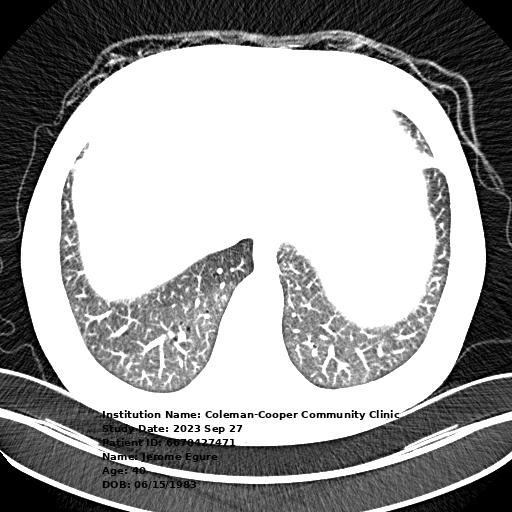

In [6]:
img_path = "../data/dicom/6670427471_05-26-2000-FORFILE_CT_ABD_ANDOR_PEL_-_CD-25398_5_000000-NEPHRO__4_0__B40f__M0_4-18678_1-010.jpg"
df = spark.read.format("binaryFile").load(img_path).cache()
display_images(BinaryToImage().transform(df))

In [7]:
ocr = ImageToTextV4() \
.setInputCol("content") \
.setOutputCol("text") \
.setServerAddress(URL_V4)

res = ocr.transform(df)
print(res.select("path", "text").collect()[0]["text"])


Institution Name: Coleman-Cooper Community Clinic
Study Date: 2023 Sep 27
Patient ID: 89437471
Name: Jane Egure
Age: 46
DOB: 06/15/1983


In [19]:
ocr = ImageToTextV5() \
.setInputCol("content") \
.setOutputCol("text") \
.setServerAddress(URL_V5)

res = ocr.transform(df)
print(res.select("path", "text").collect()[0]["text"])

Institution Name: Coleman-Cooper Community Clinic
Study Date: 2023 Sep 27
Patient ID: 8090427471
Name: Jrome Egure
Age: 40
DOB: 06/15/1983



In [7]:
ocr = ImageToTextV6() \
.setInputCol("content") \
.setOutputCol("text") \
.setServerAddress(URL_V6)

res = ocr.transform(df)
print(res.select("path", "text").collect()[0]["text"])

Institution Name: Coleman-Cooper Community Clinic
Study Date: 2023 Sep 27
Patient ID: 8847437471
Name: James Egure
Age: 40
DOB: 06/15/1983


You may see that the model may recognize text that is hardly readable by human